# Entri Module 5 - Assignment 4

### Libraries

In [77]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Load dataset

In [5]:
breast_cancer_data = load_breast_cancer()

### Creating Dataframe

In [7]:
df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
# Add the target column
df['target'] = breast_cancer_data.target

### Data Exploration

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df.shape

(569, 31)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Null & Outliers

In [14]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.skew().sort_values(ascending=True)

target                    -0.528461
worst smoothness           0.415426
mean smoothness            0.456324
worst concave points       0.492616
worst texture              0.498321
mean texture               0.650450
mean symmetry              0.725609
mean radius                0.942380
mean perimeter             0.990650
worst radius               1.103115
worst perimeter            1.128164
worst concavity            1.150237
mean concave points        1.171180
mean compactness           1.190123
mean fractal dimension     1.304489
mean concavity             1.401180
worst symmetry             1.433928
concave points error       1.444678
worst compactness          1.473555
mean area                  1.645732
texture error              1.646444
worst fractal dimension    1.662579
worst area                 1.859373
compactness error          1.902221
symmetry error             2.195133
smoothness error           2.314450
radius error               3.088612
perimeter error            3

In [17]:
def remove_outliers(df):
    
    df_cleaned = df.copy()

    for col in df_cleaned.columns:  # Exclude 'target' column
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

# Apply function to remove outliers from all numerical columns
df_no_outliers = remove_outliers(df)

In [18]:
# df_no_outliers.skew().sort_values(ascending=True) 

In [19]:
df_no_outliers.shape

(255, 31)

#### log tranf.

In [21]:
new_data= df.copy() #creating a copy before skewness corrections
for col in new_data.columns:
    if new_data[col].skew() > 1:
        new_data[col] = np.log1p(new_data[col])

print("\nSkewness after log transformation:")
print(new_data.skew().sort_values(ascending=True))


Skewness after log transformation:
target                    -0.528461
mean area                  0.287328
worst smoothness           0.415426
mean smoothness            0.456324
worst area                 0.457614
worst perimeter            0.462758
worst concave points       0.492616
worst texture              0.498321
worst radius               0.506347
texture error              0.629526
mean texture               0.650450
worst concavity            0.717939
mean symmetry              0.725609
area error                 0.847298
mean radius                0.942380
mean perimeter             0.990650
perimeter error            1.025375
mean compactness           1.043195
worst compactness          1.048729
mean concave points        1.083180
worst symmetry             1.152984
mean concavity             1.206982
mean fractal dimension     1.272294
concave points error       1.399869
worst fractal dimension    1.558559
radius error               1.713417
compactness error          1

In [22]:
new_data.shape

(569, 31)

### Split Data

In [24]:
new_data_2 = new_data.copy()
X = new_data_2.drop('target',axis=1)
y = new_data_2['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


### Feature Scaling

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [27]:
y_train_df = pd.DataFrame(y_train) #converting to data frame from series
scaler = StandardScaler()
scaler.fit(y_train_df)
y_train_scaled = scaler.transform(y_train_df)

## Report and importance (Data explorations and feature scaling)

### 1.Checked for Null Values
* No nulls found
#### Why:
* Missing values can negatively impact model performance and bias the results.

### 2.Checked for Duplicates
* No duplicates found.
#### Why:
* Duplicate data can skew model learning by giving extra weight to repeated samples.

### 3.Skewness Check & Outlier Removal (IQR Method)
* Applied the Interquartile Range (IQR) method to remove outliers.
* But, after the outlier removal major part of the data where lost : data quality loss
* so here in this case Not removing outliers using IQR,But taking Log transformation.
#### Why:
* Reducing outliers helps the model generalize better and avoid learning from extreme, non-representative data points.

### 4.Data Splitting
* Split the dataset into training and testing sets
#### Why:
* Splitting ensures that we have separate training data (to train the model) and testing data (to evaluate performance on unseen data).

### 5.Feature Scaling (StandardScaler)
* Applied StandardScaler for normalization.
#### Why:
* Improves model performance, especially for distance-based algorithms like Logistic Regression, SVM, KNN, and Neural Networks.



## Classification Algorithm Implementation

### Logistic regression

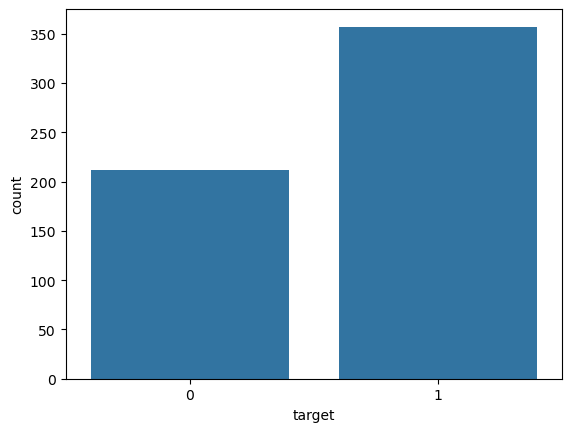

In [32]:
sns.countplot(x='target', data=new_data_2)
plt.show()

In [33]:
print("Original Class Distribution:", y_train.value_counts())
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Resampled Class Distribution:", pd.Series(y_train).value_counts())

Original Class Distribution: target
1    286
0    169
Name: count, dtype: int64
Resampled Class Distribution: target
1    286
0    286
Name: count, dtype: int64


In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [37]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1 Score: 0.97
Confusion Matrix:
[[40  3]
 [ 1 70]]


### Decision Tree Classifier


In [39]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

In [40]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

In [41]:
print(f"Accuracy: {accuracy_tree:.2f}")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall: {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")

Accuracy: 0.94
Precision: 0.97
Recall: 0.93
F1 Score: 0.95


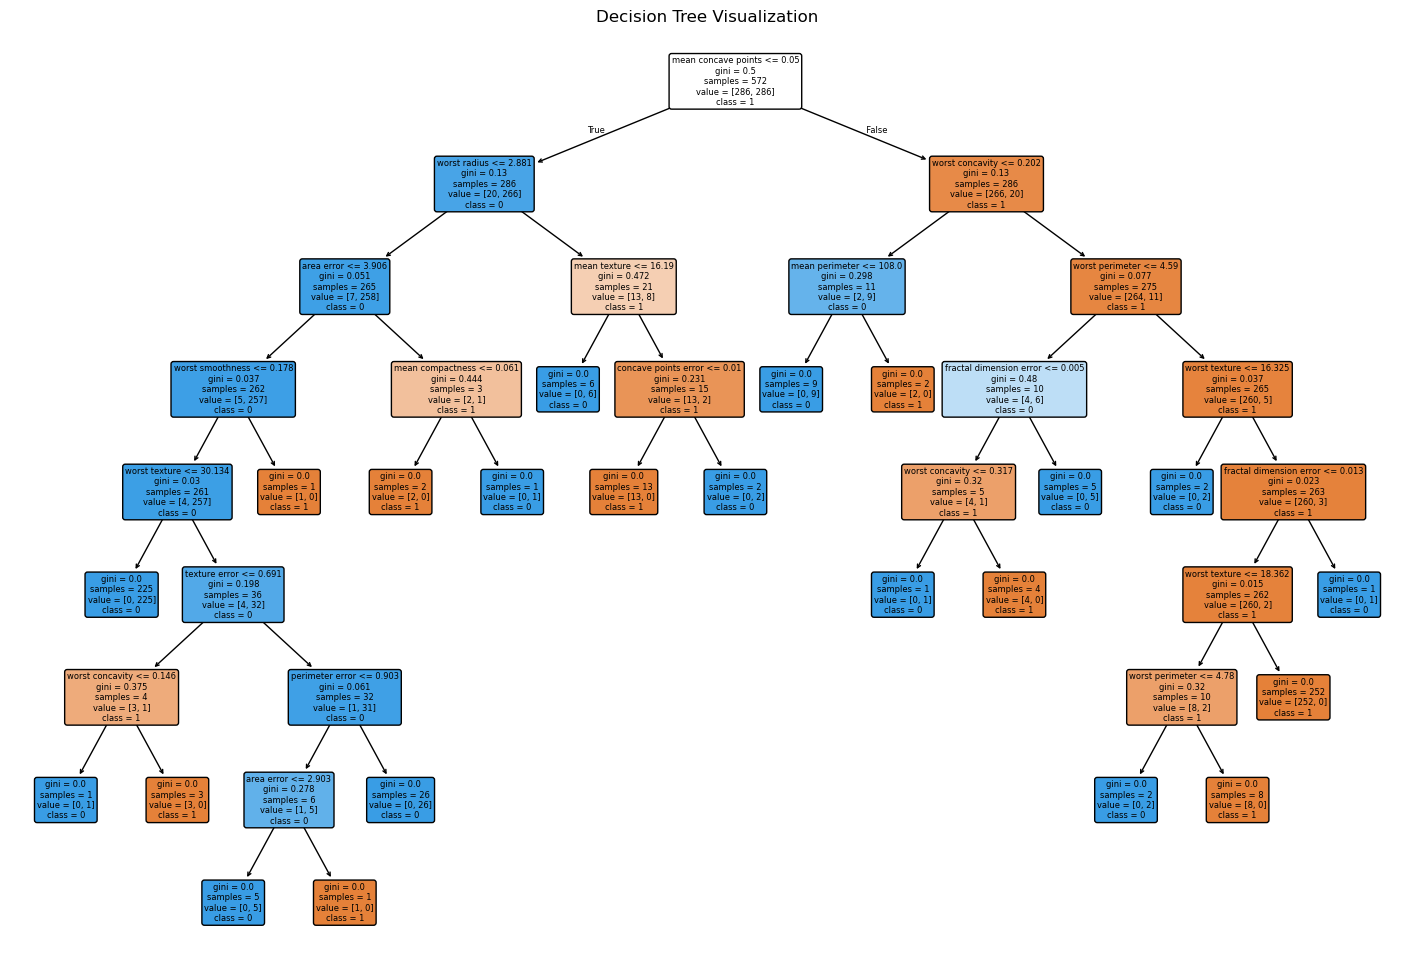

In [75]:
plt.figure(figsize=(18, 12))
tree.plot_tree(decision_tree_model, feature_names=X.columns, class_names=['1','0'], filled=True, rounded=True, fontsize=6)
plt.title("Decision Tree Visualization")
plt.show()

### Random Forest Classifier

In [79]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
y_pred_random_forest = random_forest_model.predict(X_test)

In [85]:
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

In [87]:
print(f"Accuracy: {accuracy_random_forest:.2f}")
print(f"Precision: {precision_random_forest:.2f}")
print(f"Recall: {recall_random_forest:.2f}")
print(f"F1 Score: {f1_random_forest:.2f}")
print(conf_matrix_random_forest)

Accuracy: 0.97
Precision: 0.99
Recall: 0.97
F1 Score: 0.98
[[42  1]
 [ 2 69]]


###  k-Nearest Neighbors (k-NN)

In [91]:
neigh = KNeighborsClassifier(n_neighbors = 4)

In [95]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [99]:
predict_KNN =neigh.predict(X_test)

In [101]:
accuracy_KNN = accuracy_score(y_test, predict_KNN)
precision_KNN = precision_score(y_test, predict_KNN)
recall_KNN = recall_score(y_test, predict_KNN)
f1_KNN = f1_score(y_test, predict_KNN)
conf_matrix_KNN = confusion_matrix(y_test, predict_KNN)

In [103]:
print(f"Accuracy: {accuracy_KNN:.2f}")
print(f"Precision: {precision_KNN:.2f}")
print(f"Recall: {recall_KNN:.2f}")
print(f"F1 Score: {f1_KNN:.2f}")
print(conf_matrix_KNN)

Accuracy: 0.89
Precision: 0.95
Recall: 0.87
F1 Score: 0.91
[[40  3]
 [ 9 62]]


## Conclusions

#### To determine the best-performing model, we consider multiple evaluation metrics:
* Accuracy: Overall correctness of predictions.
* Precision: How many predicted positives are actually correct.
* Recall: How many actual positives were correctly identified.
* F1 Score: Harmonic mean of precision and recall (best when both are balanced).

#### Best Model : Random Forest Classifier
* It has the highest accuracy (0.97).
* It has the highest precision (0.99), meaning fewer false positives.
* Its recall (0.97) is slightly lower than logistic regression but still strong.
* It has the highest F1 Score (0.98), which balances precision and recall effectively.